In [2]:
import sklearn as sk
import pandas as pd

In [3]:
# Option 1 ##: 
#Read data by uploading a file
from google.colab import files
uploaded = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# If you read your data by files uploading (above cell)
import io
##df = pd.read_csv(io.BytesIO(uploaded['Obrist2014_Smell_5_1.csv']))
df = pd.read_csv('/content/Obrist2014_Smell_5_1.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df[['T_TitleOfExp', 'T_Trigger']]
print(df.head())


# Read augmented db
df_aug = pd.read_csv('/content/augmented_with_backtrans.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_aug.head()

              T_TitleOfExp                                          T_Trigger
0   It Wasn't Gas I Passed  The smell was in comparison to rotten eggs and...
1      The Foul Litter box  Whenever I walked into my brother's apartment ...
2        I Can't Smell You  I, just tonight, had a coworker fart in my off...
3    Dragon Breath Teacher  Once a teacher yelled at me during class. She ...
4  The day I took a plunge  I was playing in a field with my friends when ...


text categoryNumber
0  It Wasn't Gas I Passed. The smell was in compa...           cat8
1  It Wasn't Gas I Passed. was in comparison rott...           cat8
2  information technology Wasn't vaunt single Pas...           cat8
3  information technology has not been passed. wa...           cat8
4  The Foul Litter box. Whenever I walked into my...           cat8

In [6]:
## Option 2 ##: 
# Reading data by uploading file to your drive and mount the drive from colab
# Before running this cell, upload the obrist data into the drive file. 
# You can open up the File directory from the left.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls


augmented_with_backtrans.csv
drive
glove.6B.100d.txt
glove.6B.200d.txt
glove.6B.300d.txt
glove.6B.50d.txt
glove.6B.zip
GloVe_skipgram_augmented_data_with_emotion_vectors.csv
Obrist2014_Smell_5_1.csv
sample_data


In [8]:
df = pd.read_csv('./Obrist2014_Smell_5_1.csv')
df = df[['T_TitleOfExp', 'T_Trigger']]
df.columns = ['title', 'trigger']
df.head(2)

title                                            trigger
0  It Wasn't Gas I Passed  The smell was in comparison to rotten eggs and...
1     The Foul Litter box  Whenever I walked into my brother's apartment ...

###Combining title and stories 

In [9]:
# Create an empty df for better computation speed
indices = [x for x in range(len(df))]
df_text = pd.DataFrame(columns=['text'], index=indices)

In [10]:
# Now doing row-wise combinination of title and text
for index, row in df.iterrows():
    df_text.iloc[index]['text'] = (row.title).strip() + ". " + (row.trigger).strip()

In [11]:
df = df_text
del df_text
df

text
0    It Wasn't Gas I Passed. The smell was in compa...
1    The Foul Litter box. Whenever I walked into my...
2    I Can't Smell You. I, just tonight, had a cowo...
3    Dragon Breath Teacher. Once a teacher yelled a...
4    The day I took a plunge. I was playing in a fi...
5    Eau d'Homeless (aka Why I Should Carry Febreze...
6    Stinky Pits. My daughter came into my room and...
7    too much. I put on too much cologne when I was...
8    People. I attended a seminar in which I had to...
9    Accidental compliments. I washed my clothes wi...
10   Positive licorice scent. I found out I like li...
11   Meat Fail. I walked into a meatshop, and the s...
12   B&C Incense. This was the last day of filming ...
13   The thousand dollar smell.. A few years ago we...
14   The Overwhelming Odor of Hops. I was pregnant ...
15   Pungent Supermarket Smell. I guess one of the ...
16   Cat Crap... Ohhh that smell!!!. I have three c...
17   Saved by the Smell!. Among many things in my s...
18   Accidental vegetarian. I was pregnant, so I wa...
19   Pregnancy. When I was pregnant anything that s...
20   Smell of death. I remember the smell of a nurs...
21   The Aroma that Recollects an Antecedent Amigo ...
22   Bread in the oven. The first time I ever made ...
23   Chipotle. The most memorable smell experience ...
24   Smells of subway. One day i decided to go to s...
25   Comforting sweater scent. My old grirfriend us...
26   White Lilac Sheets. My brother arrived at my h...
27   The Road to Sous Chef. I remember the first da...
28   bakery. The first time I walked into a bakery,...
29   Beginning of winter coffee.. I absolutely love...
30   Homemade Bread. Coming home from a bad day at ...
31   Thanksgiving smells of childhood. I am one of ...
32   Get Home to a Wonderful Meal. I was having a r...
33   Laughing with Cookies. I remember walking into...
34   Airplane Odor. I hate to travel and one thing ...
35   ER Odors and Funk. Entering an emergency room ...
36   Frosting Donuts. The smell of a donut shop, or...
37   The smell of an Ex. My scent memory has to do ...
38   Redbull. Everytime I smell red bull I think of...
39   No curry for you!. The smell of rotting Indian...
40   Gramma. When my gramma was dying she had sores...
41   Dead Body. The first time that I smelled a dec...
42   The End of his life , beginning of flowers.. T...
43   Everyday Scents. the smell I am thinking of is...
44   My Grandpa's Money Machine. When I was extreme...
45   moms cookies. I like of the smell of moms cook...
46   grandfather. My grandfather smoked a pipe. Sme...
47   Dramatic Smells. I remember walking onto a hos...
48   Sauerkraut and mothballs. I remember when I wa...
49   My trip to the zoo. Going to the zoo as a chil...
50   Mamaw's Closet. I went into my grandmother's c...
51   Bay Air. Driving down the shore to Wildwood, N...
52   Smells Like Mamaw's House. Everytime we would ...
53   The smell of Christmas. The smell of cinnamon ...
54   Peppery Shame. I remember the peppery smell of...
55   Car Crash. When I was 16 I crashed my car into...
56   First Time At The Nursing Home. My mom was tra...
57   Mommy Dearest's Perfume Makes Vomit Bloom. My ...
58   Smellerific. I drank (nearly) an entire 750ml ...
59   pine tree. When I was a kid, I was sledding in...
60   smell of new house. I remember when I was 8 ye...
61   The Smell of My Past. I once dated a guy that ...
62   The Essence of  Surgery. One particular memora...
63   Death and it's presence. The smell that most s...
64   When my mother died. I remember when I went to...
65   My Moms Purse. The most memorable smell is the...
66   The best part of waking up. When I was young a...
67   The Smell of Coffee in the Morning. The smell ...
68   Schools Out. Every spring, The smell of a sunn...
69   Funnel Cakes of Joy. My childhood wasn't the g...
70   First ejaculation. When I was twelve, I had my...
71   Boyfriend's cologne; bringing back memories fr...
72   Changing Alex. The first time 

In [12]:
df['original'] = df['text']

print(df.iloc[0]['text'])


It Wasn't Gas I Passed. The smell was in comparison to rotten eggs and the reason it is so memorable is because the source of the smell was coming from my mouth. I was in a small room full of people who assumed someone had released gas and was too embarrassed to fess up to the real source. Needless to say I called my mom to come and get me, and left as quickly as I could. I am sure they figured out the source once I was gone and it no longer smelled like that there.


###Remove punctuation

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['text']=df['text'].map(lambda x: remove_punctuation(x))
print(df.head())


df_aug['text']=df_aug['text'].map(lambda x: remove_punctuation(x))
df_aug.head()

                                                text  \
0  It Wasnt Gas I Passed The smell was in compari...   
1  The Foul Litter box Whenever I walked into my ...   
2  I Cant Smell You I just tonight had a coworker...   
3  Dragon Breath Teacher Once a teacher yelled at...   
4  The day I took a plunge I was playing in a fie...   

                                            original  
0  It Wasn't Gas I Passed. The smell was in compa...  
1  The Foul Litter box. Whenever I walked into my...  
2  I Can't Smell You. I, just tonight, had a cowo...  
3  Dragon Breath Teacher. Once a teacher yelled a...  
4  The day I took a plunge. I was playing in a fi...  


text categoryNumber
0  It Wasnt Gas I Passed The smell was in compari...           cat8
1  It Wasnt Gas I Passed was in comparison rotten...           cat8
2  information technology Wasnt vaunt single Pass...           cat8
3  information technology has not been passed was...           cat8
4  The Foul Litter box Whenever I walked into my ...           cat8

In [15]:
!pip install unidecode
print(df.head(10))
print(df_aug.head())
import unidecode
def remove_accents(text):
  #print(text)
  #unaccented_string = unidecode.unidecode(text)
  #return unaccented_string
  no_punct=[unidecode.unidecode(words) for words in text]
  words_wo_punct=''.join(no_punct)
  return words_wo_punct

df_aug['text']=df_aug['text'].map(lambda x: remove_accents(x))
df_aug.head()

df['text']=df['text'].map(lambda x: remove_accents(x))
df.head(10)







                                                text  \
0  It Wasnt Gas I Passed The smell was in compari...   
1  The Foul Litter box Whenever I walked into my ...   
2  I Cant Smell You I just tonight had a coworker...   
3  Dragon Breath Teacher Once a teacher yelled at...   
4  The day I took a plunge I was playing in a fie...   
5  Eau dHomeless aka Why I Should Carry Febreze A...   
6  Stinky Pits My daughter came into my room and ...   
7  too much I put on too much cologne when I was ...   
8  People I attended a seminar in which I had to ...   
9  Accidental compliments I washed my clothes wit...   

                                            original  
0  It Wasn't Gas I Passed. The smell was in compa...  
1  The Foul Litter box. Whenever I walked into my...  
2  I Can't Smell You. I, just tonight, had a cowo...  
3  Dragon Breath Teacher. Once a teacher yelled a...  
4  The day I took a plunge. I was playing in a fi...  
5  Eau d'Homeless (aka Why I Should Carry Febreze... 

text  \
0  It Wasnt Gas I Passed The smell was in compari...   
1  The Foul Litter box Whenever I walked into my ...   
2  I Cant Smell You I just tonight had a coworker...   
3  Dragon Breath Teacher Once a teacher yelled at...   
4  The day I took a plunge I was playing in a fie...   
5  Eau dHomeless aka Why I Should Carry Febreze A...   
6  Stinky Pits My daughter came into my room and ...   
7  too much I put on too much cologne when I was ...   
8  People I attended a seminar in which I had to ...   
9  Accidental compliments I washed my clothes wit...   

                                            original  
0  It Wasn't Gas I Passed. The smell was in compa...  
1  The Foul Litter box. Whenever I walked into my...  
2  I Can't Smell You. I, just tonight, had a cowo...  
3  Dragon Breath Teacher. Once a teacher yelled a...  
4  The day I took a plunge. I was playing in a fi...  
5  Eau d'Homeless (aka Why I Should Carry Febreze...  
6  Stinky Pits. My daughter came into my room and...  
7  too much. I put on too much cologne when I was...  
8  People. I attended a seminar in which I had to...  
9  Accidental compliments. I washed my clothes wi...

###Tokenization - Tokenizing is the process of splitting strings into a list of words. Here, “\W+” splits on one or more non-word character

In [16]:
import re
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['text']=df['text'].map(lambda x: tokenize(str(x)))
df.head()

df_aug['text']=df_aug['text'].map(lambda x: tokenize(str(x)))
df_aug.head()

text categoryNumber
0  [It, Wasnt, Gas, I, Passed, The, smell, was, i...           cat8
1  [It, Wasnt, Gas, I, Passed, was, in, compariso...           cat8
2  [information, technology, Wasnt, vaunt, single...           cat8
3  [information, technology, has, not, been, pass...           cat8
4  [The, Foul, Litter, box, Whenever, I, walked, ...           cat8

###Remove stop word - Stop words are irrelevant words that won’t help

In [17]:
import nltk 
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])
def remove_stopwords(text):
    #Lowercased it 
    #filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    text = [word.lower() for word in text]
    text=[word for word in text if len(word) > 2 if not word in stopword]
    return text
df['text'] = df['text'].map(lambda x: remove_stopwords(x))
df.head()

df_aug['text']=df_aug['text'].map(lambda x: remove_stopwords(x))
df_aug.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


text categoryNumber
0  [wasnt, gas, passed, smell, comparison, rotten...           cat8
1  [wasnt, gas, passed, comparison, rotten, eggs,...           cat8
2  [information, technology, wasnt, vaunt, single...           cat8
3  [information, technology, passed, comparable, ...           cat8
4  [foul, litter, box, whenever, walked, brothers...           cat8

In [18]:
#join all sentence into one string
def joinSentence(sentence):
    return " ".join(sentence)



sentences = df_aug['text'].apply(lambda s:joinSentence(s))
corpus = " ".join(sentences)
corpus = corpus.split()
print(corpus)





['wasnt', 'gas', 'passed', 'smell', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'source', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'get', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'gone', 'longer', 'smelled', 'like', 'wasnt', 'gas', 'passed', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'longer', 'smelled', 'like', 'information', 'technology', 'wasnt', 'vaunt', 'single', 'passed', 'comparability', 'crappy', 'testis', 'cause', 'memorable', 'flavour', 'orgasm', 'mouth', 'lowly', 'board', 'broad', 'citizenry', 'arrogate', 'mortal', 'bring', 'gaseous', 'state', 'humil

###Stemming is the process of reducing a word to its root form.

In [19]:
#stemming using porter stemmer -> reduces words to their base words

nltk.download('wordnet')
from nltk.stem.porter import *
p_stemmer = PorterStemmer()

def stem(text):
    text=[p_stemmer.stem(word) for word in text]
    return text

df['text_processed'] = df['text'].map(lambda x: stem(x))

#df.to_csv('cleaned_stories.csv') 
#files.download('cleaned_stories.csv')
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  
0  [wasnt, ga, pass, smell, comparison, rotten, e...  
1  [foul, litter, box, whenev, walk, brother, apa...  
2  [cant, smell, tonight, cowork, fart, offic, le...  
3  [dragon, breath, teacher, teacher, yell, class...  
4  [day, took, plung, play, field, friend, trip, ...

Lemmatising



In [20]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma(text):
  lemma_words=[lemmatizer.lemmatize(w) for w in text]
  return lemma_words

df['text_processed'] = df['text_processed'].map(lambda x: lemma(x))
df.head()

text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  
0  [wasnt, ga, pas, smell, comparison, rotten, eg...  
1  [foul, litter, box, whenev, walk, brother, apa...  
2  [cant, smell, tonight, cowork, fart, offic, le...  
3  [dragon, breath, teacher, teacher, yell, class...  
4  [day, took, plung, play, field, friend, trip, ...

###Pos tagging 

In [21]:
# required for tokenization
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
from nltk import word_tokenize, pos_tag

def positionOfTagSentence(sentence):
    sentence = " ".join(sentence)
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

In [23]:
df['text_POS'] = df['text'].apply(lambda s:positionOfTagSentence(s))
df.head()


text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  \
0  [wasnt, ga, pas, smell, comparison, rotten, eg...   
1  [foul, litter, box, whenev, walk, brother, apa...   
2  [cant, smell, tonight, cowork, fart, offic, le...   
3  [dragon, breath, teacher, teacher, yell, class...   
4  [day, took, plung, play, field, friend, trip, ...   

                                            text_POS  
0  [(wasnt, NN), (gas, NN), (passed, VBD), (smell...  
1  [(foul, NN), (litter, NN), (box, NN), (wheneve...  
2  [(cant, NN), (smell, NN), (tonight, NN), (cowo...  
3  [(dragon, NN), (breath, NN), (teacher, NN), (t...  
4  [(day, NN), (took, VBD), (plunge, NN), (playin...

Skip Gram Model

In [24]:
from keras.preprocessing import text

In [25]:
tokenizer = text.Tokenizer()
print(corpus)

tokenizer.fit_on_texts(corpus)


word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}
vocab_size = len(word2id) + 1 

print(vocab_size)

embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corpus]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:100])


['wasnt', 'gas', 'passed', 'smell', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'source', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'get', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'gone', 'longer', 'smelled', 'like', 'wasnt', 'gas', 'passed', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'longer', 'smelled', 'like', 'information', 'technology', 'wasnt', 'vaunt', 'single', 'passed', 'comparability', 'crappy', 'testis', 'cause', 'memorable', 'flavour', 'orgasm', 'mouth', 'lowly', 'board', 'broad', 'citizenry', 'arrogate', 'mortal', 'bring', 'gaseous', 'state', 'humil

# Word Vecotorisation -skip gram
  

In [26]:
from keras.preprocessing.sequence import skipgrams
print(id2word)
# generate skip-grams
print(wids)
skip_grams = [skipgrams(wids, vocabulary_size=vocab_size, window_size=4) ]


#pairs, labels = skipgrams(wids, len(word2id),window_size=10)

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]

for pair in skip_grams[0][0]:
   pair[0] = pair[0][0]
   if isinstance(pair[1], list):
     pair[1] = pair[1][0]
  
  
#   #print(pair)

for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

{1: 'smell', 2: 'time', 3: 'one', 4: 'day', 5: 'iodine', 6: 'first', 7: 'would', 8: 'scent', 9: 'like', 10: 'smelled', 11: 'number', 12: 'house', 13: 'atomic', 14: 'back', 15: 'remember', 16: 'could', 17: 'new', 18: 'get', 19: 'information', 20: 'technology', 21: 'sense', 22: 'smells', 23: 'home', 24: 'ace', 25: 'every', 26: 'memorable', 27: 'unity', 28: 'experience', 29: 'something', 30: 'really', 31: 'single', 32: 'always', 33: 'car', 34: 'perfume', 35: 'take', 36: 'made', 37: 'air', 38: 'feel', 39: 'think', 40: 'feeling', 41: 'olfactory', 42: 'good', 43: 'years', 44: 'ever', 45: 'room', 46: 'used', 47: 'even', 48: 'didnt', 49: 'ane', 50: 'family', 51: 'still', 52: 'fresh', 53: 'food', 54: 'smelling', 55: 'away', 56: 'odor', 57: 'iodin', 58: 'make', 59: 'work', 60: 'memories', 61: 'coffee', 62: 'memory', 63: 'place', 64: 'way', 65: 'sweet', 66: 'old', 67: 'pizza', 68: 'life', 69: 'love', 70: 'walking', 71: 'school', 72: 'never', 73: 'much', 74: 'walk', 75: 'aroma', 76: 'walked', 77: 

# Import Word Embeddings

In [ ]:
#https://keras.io/examples/nlp/pretrained_word_embeddings/
#https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/

In [26]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


--2021-03-11 19:19:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-11 19:19:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-11 19:19:45--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [27]:
import os
import numpy as np


path_to_glove_file = os.path.join(
    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
)

# f = open('../input/glove6b/glove.6B.300d.txt')

# embeddings_index = {}
# with open(path_to_glove_file) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs

# print("Found %s word vectors." % len(embeddings_index))

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [28]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       935800      embedding_input[0][0]            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       935800      embedding_1_input[0][0]          
______________________________________________________________________________________________

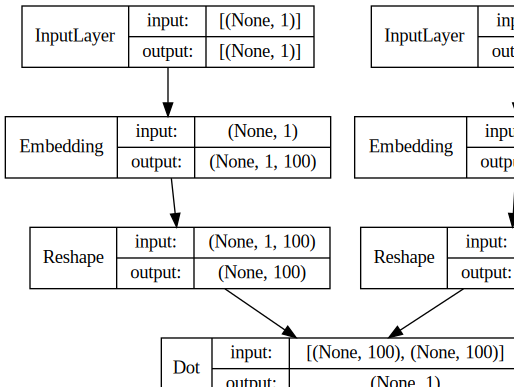

In [29]:
 
from keras.layers import dot
from keras.models import Model
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
 
# build skip-gram architecture
word_model = Sequential()
#model.add(Embedding(size_of_vocabulary,300,weights=[embedding_matrix],input_length=100,trainable=False)) 
word_model.add(Embedding(vocab_size, embed_size,weights=[embedding_matrix],input_length=1,trainable=False))
                         


# word_model.add(Embedding(vocab_size, embed_size,
#                          embeddings_initializer="glorot_uniform",
#                          input_length=1))
word_model.add(Reshape((embed_size, )))
 
context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,weights=[embedding_matrix],input_length=1,trainable=False))
# context_model.add(Embedding(vocab_size, embed_size,
#                   embeddings_initializer="glorot_uniform",
#                   input_length=1))
context_model.add(Reshape((embed_size,)))
 
 
dot_product = dot([word_model.output, context_model.output], axes=1,
                  normalize=False) 
dot_product = Dense(1, kernel_initializer="glorot_uniform", 
              activation="sigmoid")(dot_product) 
model = Model(inputs=[word_model.input, context_model.input], 
              outputs=dot_product) 
model.compile(loss="mean_squared_error", optimizer="rmsprop") 
 
#model = Sequential()
#model.add(Merge([word_model, context_model], mode="dot"))
#model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
#model.compile(loss="mean_squared_error", optimizer="rmsprop")
 
# view model summary
print(model.summary())
 
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
 
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [30]:
import numpy as np
for epoch in range(1, 50):
  loss = 0
  for i, elem in enumerate(skip_grams):
    pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
    #print(pair_first_elem)
    pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
    labels = np.array(elem[1], dtype='int32')
    X = [pair_first_elem, pair_second_elem]
    Y = labels
    if i % 10000 == 0:
      print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
    loss += model.train_on_batch(X,Y)  

  print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 0.5152018666267395
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 0.515086829662323
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 0.5150033235549927
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 0.5149331092834473
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 5 Loss: 0.5148707032203674
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 6 Loss: 0.514813244342804
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 7 Loss: 0.5147596597671509
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 8 Loss: 0.5147088766098022
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 9 Loss: 0.5146601796150208
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 10 Loss: 0.5146130919456482
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 11 Loss: 0.5145672559738159
Processed 0 (skip_fir

In [31]:
merge_layer = model.layers[0]
word_embed_layer = model.layers[2]
weights = word_embed_layer.get_weights()[0][1:]

print(weights.shape)
pd.DataFrame(weights, index=id2word.values())

(9357, 100)


In [32]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['smell', 'remember', 'scent', 'gas', 'experience', 'aroma', 'grandma', 'fart', 'deodorant']}

similar_words

(9357, 9357)


{'aroma': ['pungent', 'flavor', 'aromas', 'flavour', 'sweetness'],
 'deodorant': ['shampoo', 'deodorants', 'shampoos', 'cleanser', 'lotion'],
 'experience': ['experiences', 'sort', 'kind', 'mind', 'learning'],
 'fart': ['briquette', 'bakehouse', 'mouldy', 'acetum', 'farted'],
 'gas': ['fuel', 'electricity', 'oil', 'coal', 'pipeline'],
 'grandma': ['grandpa', 'mom', 'aunt', 'grandmother', 'dad'],
 'remember': ['forget', 'imagine', 'maybe', 'tell', 'wonder'],
 'scent': ['scents', 'fragrance', 'pungent', 'odor', 'smell'],
 'smell': ['odor', 'smells', 'smelling', 'stench', 'smelled']}

Total words: 54 	Word Embedding shapes: (54, 100)


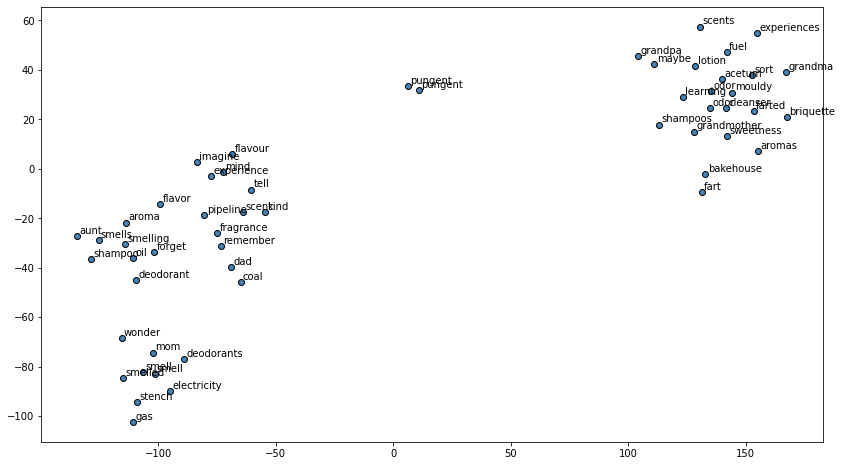

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:

#https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html

# Adding Vectors

In [34]:
df_weighting = pd.DataFrame(weights, id2word.values())
df_weighting.head()
word = "wasnt"
#print(df_weighting.loc[[word],:].to_string(index=False))
#print(df_weighting.loc[["fiancé"],:].to_string(index=False))



In [43]:
# import nltk
# import numpy as np
# nltk.download('vader_lexicon')
# import math 

# from nltk.sentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
# ans = sia.polarity_scores("This crab cake tastes kind of funky")
# print(ans)
# ans['compound']
# result = ans.values() 
  
# # Convert object to a list 
# data =np.array( list(result) )
# data

# new  = np.array([-1, -1/math.sqrt(2), 1/math.sqrt(2), 1 ])

# print(new * data)

# np.linalg.norm(new * data)
# ans2 =new*data
# #min(new*data)
# x = ans2[np.argmax(np.abs(ans2))]
# x
happy = np.zeros(100)
sad = np.zeros(100)
surprise = np.zeros(100)
angry = np.zeros(100)
fear = np.zeros(100)
for x in range(0, 33):
  happy[x] = 5

print(happy)

for x in range(0, 33):
  sad[x] = -5

print(sad)

for x in range(33, 66):
  angry[x] = -5

print(angry)

for x in range(33, 66):
  fear[x] = 5

print(fear)

for x in range(66, 99):
  surprise[x] = 5

print(surprise)

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.  0.  0.  0.  0.  0.

In [35]:
!pip install text2emotion
import text2emotion as te
text = "I was asked to sign a third party contract a week out from stay. If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. Perhaps some people like this but It negatively affected our enjoyment of the accommodation. Stairs - lots of them - some had slightly bending wood which caused a minor injury."
te.get_emotion(text)

{'Angry': 0.12, 'Fear': 0.42, 'Happy': 0.04, 'Sad': 0.33, 'Surprise': 0.08}


```
# This is formatted as code
```
[link text](https://)


In [44]:
import nltk
import numpy as np
nltk.download('vader_lexicon')
import math 

#!pip install text2emotion
import text2emotion as te
#text = "I was asked to sign a third party contract a week out from stay. If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. Perhaps some people like this but It negatively affected our enjoyment of the accommodation. Stairs - lots of them - some had slightly bending wood which caused a minor injury."
#te.get_emotion(text)


from nltk.sentiment import SentimentIntensityAnalyzer

bigDictionary = {}

def addWordVectors(s):
  print(s.index[0])
  #print(s['text'])
  
  stories = s['text']
  original = s['original']

  for x in original:

    # ans = sia.polarity_scores(x)
    # print(ans)
    emotions = te.get_emotion(x)
    #print(emotions)
    result = emotions.values() 
  
    # # Convert object to a list 
    data = np.array( list(result) )
    index = np.argmax(np.abs(data))
    #print(index)

  print(original)
  first = True
  count = 0 
  for x in stories:
    for i in x:
      
      count+=1
      if first:
        ans = df_weighting.loc[i]
        first=False
      else:
        ans = ans.add(df_weighting.loc[i])
      #print(i)
  #print(stories[0])
  #print(stories[0])
  #print(len)
  #print(df_weighting.loc[stories[0]])
  #for x in range(1, len(stories)):
    #ans = ans.add(df_weighting.loc[stories[x]])
  #story = s['original']

  first = ans * float(1/count);

  first = first.add(data[0]*happy)
  first = first.add(data[1]*happy)
  first = first.add(data[2]*happy)
  first = first.add(data[3]*happy)
  first = first.add(data[4]*happy)
  # if index == 0:
  #   first  = first.add(happy) 
  # if index == 1:
  #   first = first.add(angry) 
  # if index == 2:
  #   first = first.add(surprise) 
  # if index == 3: 
  #   first = first.add(sad) 
  # if index == 4: 
  #   first = first.add(fear) 
  # print(first)

  bigDictionary[s.index[0]] = first
  #print(ans)
  
print(df.head())



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                                text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  \
0  [wasnt, ga, pas, smell, comparison, rotten, eg...   
1  [foul, litter, box, whenev, walk, brother, apa...   
2  [cant, smell, tonight, cowor

In [45]:
# def positionOfTagSentence(sentence):
#   sum = []
#   for x in sentence:



#     sentence = " join(sentence)
#     tokens = word_tokenize(sentence)
#     return pos_tag(tokens)

count = 0
#df.loc[[s],['text','original']].apply(lambda s: addWordVectors(s))
#print(len(df))
for x in range(0, len(df)):
  addWordVectors(df.loc[[x],['text','original'] ])
#df['text'].apply(lambda s:addWordVectors(s))
df.head()
#print(bigDictionary)
  

0
0    It Wasn't Gas I Passed. The smell was in compa...
Name: original, dtype: object
1
1    The Foul Litter box. Whenever I walked into my...
Name: original, dtype: object
2
2    I Can't Smell You. I, just tonight, had a cowo...
Name: original, dtype: object
3
3    Dragon Breath Teacher. Once a teacher yelled a...
Name: original, dtype: object
4
4    The day I took a plunge. I was playing in a fi...
Name: original, dtype: object
5
5    Eau d'Homeless (aka Why I Should Carry Febreze...
Name: original, dtype: object
6
6    Stinky Pits. My daughter came into my room and...
Name: original, dtype: object
7
7    too much. I put on too much cologne when I was...
Name: original, dtype: object
8
8    People. I attended a seminar in which I had to...
Name: original, dtype: object
9
9    Accidental compliments. I washed my clothes wi...
Name: original, dtype: object
10
10    Positive licorice scent. I found out I like li...
Name: original, dtype: object
11
11    Meat Fail. I walked into a meats

text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  \
0  [wasnt, ga, pas, smell, comparison, rotten, eg...   
1  [foul, litter, box, whenev, walk, brother, apa...   
2  [cant, smell, tonight, cowork, fart, offic, le...   
3  [dragon, breath, teacher, teacher, yell, class...   
4  [day, took, plung, play, field, friend, trip, ...   

                                            text_POS  
0  [(wasnt, NN), (gas, NN), (passed, VBD), (smell...  
1  [(foul, NN), (litter, NN), (box, NN), (wheneve...  
2  [(cant, NN), (smell, NN), (tonight, NN), (cowo...  
3  [(dragon, NN), (breath, NN), (teacher, NN), (t...  
4  [(day, NN), (took, VBD), (plunge, NN), (playin...

In [46]:
numbers= []
for x in range(0,439):
  numbers.append(x)

#numbers

df_sentence_vector = pd.DataFrame(bigDictionary,columns=numbers).transpose()
df_sentence_vector


0         1         2         3         4         5         6   \
0    4.935086  5.205180  5.392754  4.647176  4.845391  5.163684  4.910272   
1    5.001095  5.194669  5.301159  4.607055  4.815016  5.398989  4.885683   
2    5.003537  5.126587  5.341405  4.758445  4.847473  5.317016  5.057917   
3    5.141530  5.252226  5.345101  4.760396  4.797999  5.261980  4.770391   
4    5.034620  5.237494  5.423294  4.768386  4.890391  5.406663  5.026776   
5    5.004414  5.200738  5.205792  4.740463  4.938958  5.234252  4.868669   
6    5.142270  5.161058  5.152597  4.568384  4.657441  5.071955  4.994217   
7    5.090218  5.304209  5.241621  4.676735  4.679832  5.166448  4.818492   
8    4.948316  5.354920  5.175457  4.883682  4.917340  5.183086  4.954155   
9    4.940721  5.247322  5.220993  4.608552  4.595390  5.185455  4.800807   
10   5.019992  5.542387  4.949094  4.760765  5.011316  5.118772  4.933241   
11   5.040427  5.277742  5.247445  4.640867  4.804527  5.379832  5.035038   
12   4.979795  5.157981  5.143377  4.757606  5.013421  5.224601  4.893853   
13   5.123553  5.271195  5.301098  4.900556  4.897271  5.097190  4.925701   
14   5.111130  5.194236  5.258919  4.816562  4.890934  5.252966  5.091551   
15   5.031804  5.229542  5.296101  4.576222  4.915803  5.101541  4.988572   
16   4.920103  5.337874  5.269470  4.679368  4.868831  5.207610  5.042484   
17   4.974003  5.125135  5.238463  4.726751  4.677791  5.147499  4.891058   
18   4.868797  5.270247  5.100319  4.883971  4.572749  5.170319  5.093126   
19   4.942753  5.318207  5.403742  4.619793  4.635002  5.038557  5.025688   
20   4.914559  5.322482  5.432793  4.810019  4.670880  5.313603  4.798296   
21   5.044683  5.215934  5.169504  4.849730  4.883311  5.200720  4.961939   
22   4.937979  5.294508  5.146098  4.805668  4.897961  5.197676  5.104532   
23   4.979554  5.197604  5.238543  4.624030  4.873756  5.226636  5.060741   
24   5.105296  5.311136  5.231936  4.792050  5.071468  5.172310  5.085443   
25   4.857171  5.231541  5.215604  4.708624  4.856237  5.287535  4.977445   
26   4.729193  5.292896  5.132411  4.723596  4.755309  5.190917  4.892790   
27   4.830978  5.306438  5.186873  4.950615  4.931445  5.151431  5.138594   
28   4.997621  5.159153  5.141215  4.797589  4.719260  5.222703  4.932205   
29   5.026733  5.348088  5.112956  4.882613  4.958518  5.259618  5.223128   
30   4.838023  5.232533  5.113555  4.880912  4.634420  5.169496  4.975506   
31   4.974804  5.208942  5.153941  4.801442  4.887795  5.226558  5.086972   
32   4.871280  5.291254  5.295990  4.653245  4.806108  5.183817  4.927115   
33   4.836050  5.300929  5.109327  4.728982  4.783466  5.347182  5.100356   
34   4.939551  5.417572  5.383981  4.603866  4.727997  5.333360  4.902914   
35   4.911232  5.228671  5.263425  4.704865  4.811944  5.393058  4.825243   
36   5.078030  5.066014  5.094036  4.731129  4.777321  5.212065  4.999004   
37   5.106686  5.281108  5.373478  4.776943  4.925862  5.287001  5.045012   
38   5.020944  5.183019  5.299239  4.441214  4.587457  5.297742  4.981372   
39   4.763720  5.218020  5.161250  4.775135  4.908526  5.242220  5.104939   
40   5.017668  5.298107  5.331180  4.648665  4.669486  5.224192  4.829991   
41   4.970722  5.258315  5.369146  4.781034  4.852531  5.390828  4.979877   
42   5.076214  5.386997  5.234497  4.915001  5.007658  5.289324  4.868488   
43   4.967728  5.215379  5.141390  4.683604  4.733803  5.197101  4.843398   
44   5.070536  5.224837  5.164645  4.755178  4.843466  5.281010  4.896092   
45   4.839457  5.469886  5.203219  4.575420  4.627899  5.475865  5.113397   
46   5.236379  5.288052  5.234917  4.767914  4.828186  5.062279  4.981862   
47   5.047676  5.332526  5.251184  4.773054  4.832992  5.342414  4.843510   
48   4.908159  5.373609  5.258366  4.783334  5.027144  5.381117  4.987147   
49   5.087055  5.325512  5.509718  4.747486  4.785836  5.276823  4.847658   
50   5.135362  5.337443  5.303278  4.540670  4.852327  5.417560  4.858646   
51   4.

In [47]:
glove_skip_gram = df_sentence_vector.to_csv('GloVe_skipgram_augmented_data_with_emotion_vectors.csv', index = True) 
print('\nCSV String:\n', glove_skip_gram) 


CSV String:
 None


# Clustering - K-means


K-means Tutorial: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=10 , init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict( )

TypeError: ignored

### TRY pretrained 

In [ ]:
import nltk
import numpy as np
nltk.download('vader_lexicon')
import math 

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
ans = sia.polarity_scores("This crab cake tastes kind of funky")
print(ans)
ans['compound']
result = ans.values() 
  
# Convert object to a list 
data =np.array( list(result) )
data

new  = np.array([-1, -1/math.sqrt(2), 1/math.sqrt(2), 1 ])

print(new * data)

np.linalg.norm(new * data)
ans2 =new*data
#min(new*data)
x = ans2[np.argmax(np.abs(ans2))]
x

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.1761}
[-0.22       -0.55154329  0.         -0.1761    ]


-0.551543289325507